GMM的模型构成为：
p(x)=∑_j^m▒〖p(x│z=j)p(z=j)〗
x|z=j ~ N(u_j, Σ_j)，m个高斯分布，u_j, Σ_j 分别为每个高斯分布的均值和标准差
z ~ Multinomial(ϕ)，多项分布，
x是observed variables，z是latent variables

模型通过EM算法进行优化求解参数的最优值。
将模型拟合后，可以得到模型的各个最优参数值。

模型包含1个超参数：
m, Gaussian的个数 对应sklearn API 的 n_components


先用1维数据有个直观理解

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
import numpy as np
from sklearn.datasets import make_blobs


In [23]:
X, y = make_blobs(n_samples=1500,
                  centers=((-10, ), (-5, ), (0, ), (5, ), (10, )),
                  cluster_std=5.0,
                  random_state=42)

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=5, n_init=10)
gm.fit(X)



GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [24]:
gm.means_, 

(array([[-13.40268786],
        [  6.03655667],
        [ 12.58448147],
        [ -7.26348915],
        [ -0.98889158]]),)

In [25]:
gm.covariances_

array([[[10.87720309]],

       [[ 7.96126756]],

       [[15.18789081]],

       [[ 5.95358358]],

       [[ 6.68288732]]])

In [26]:
pdf = gm.score_samples
p = np.exp(pdf(X))

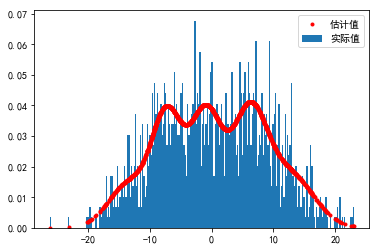

In [27]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
def plot_point_1dim(X, p):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    hist = ax.hist(X, bins=250, rwidth=1.0, density=True, label='实际值')
    ax.plot(X[:, 0], p, 'r.', label='估计值')
    ax.legend()
plot_point_1dim(X, p)

二维数据，  
生成数据

In [28]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), cluster_std=1.0, random_state=42)
# X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=((6, -8), ), cluster_std=1.0, random_state=42)
X = np.r_[X1, X2]
y = np.r_[y1, y2]

X1的feature数目为2，内含2个cluster，std均为1.0，中心点坐标为：

In [29]:
# center1 = np.array(((10, -10), (0, 0))) @ np.array([[0.374, 0.95], [0.732, 0.598]])
center1 = np.array(((4, -4), (0, 0)))
print(center1)

[[ 4 -4]
 [ 0  0]]


X2的feature数目为2，内含1个cluster，std为1.0，中心点坐标为：

In [30]:
center2 = np.array((6, -8))[np.newaxis, :]
center2

array([[ 6, -8]])

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x199217a5eb8>])

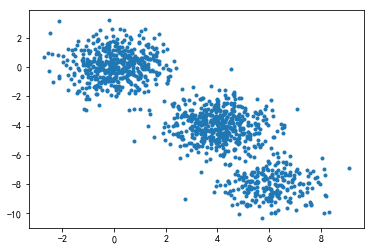

In [31]:
def plot_point(X):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    point = ax.plot(X[:, 0], X[:, 1], '.')
    return fig, ax, point
plot_point(X)

In [32]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

ϕ 求解为每一个mixture component的sample所占比例

In [33]:
gm.weights_ 

array([0.40262035, 0.39943904, 0.19794061])

可以求出每个高斯分布的均值和标准差，可以看到跟数据实际的均值和方差很接近了

In [34]:
gm.means_

array([[ 4.00782288, -3.97084737],
       [ 0.06065443,  0.08100889],
       [ 6.00791078, -8.0115578 ]])

In [35]:
gm.covariances_

array([[[ 0.95146257, -0.03923598],
        [-0.03923598,  1.01185461]],

       [[ 0.90947639,  0.03096828],
        [ 0.03096828,  1.07346461]],

       [[ 0.99184045,  0.00795452],
        [ 0.00795452,  0.87050362]]])

求解总体的p(x)（实际求的是log⁡(p(x)）

In [36]:
pdf = gm.score_samples
pdf(X), np.exp(pdf(X))

(array([-3.36019678, -4.31444778, -4.10279794, ..., -3.91862219,
        -4.05836577, -3.51580706]),
 array([0.03472842, 0.01337393, 0.01652637, ..., 0.01986845, 0.01727723,
        0.0297238 ]))

这是3个中心点的pdf

In [37]:
np.exp(pdf(center1)), np.exp(pdf(center2))

(array([0.06532966, 0.06405518]), array([0.03390502]))

主要参考资料：  
《Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow》9.2  
Andrew Ng CS229-LN7b